In [1]:
# этот ноутбук относится к лабе 3.4.5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Ri = 20*10**3
Ci = 20*10**-6
R0 = 0.22
w = 50

In [3]:
data = pd.DataFrame()
data['N0'] = [15, 45, 20]
data['Nu'] = [300, 400, 200]
data['S']  = [0.66, 3, 2]
data['S']  = data['S'] * 10**-4
data['2pr']= [14.1, 25, 11]
data['2pr']= data['2pr'] * 10**-2
data['i']  = [0.229, 0.9377, 1.2978]
# коэффиценты преобразования:
data['Ky'] = [0.048295, 0.048295, 0.019445]
data['Kx'] = [0.022712, 0.005725, 0.117606]
data['H'] = data['Kx'] * data['N0'] / data['2pr'] / R0
data['B'] = data['Ky'] * Ri * Ci / (data['S'] * data['Nu'])
data.index = ["Fe-Ni", "Fe", "Fe-Si"]

data['delta_x'] = [2.3, 1.7, 0.6]
data['delta_y'] = [1.8, 1.2, 1.6]
data['lim_y']   = [1.8, 3, 4]
data['intersec_x'] = [2.3, 1.7, 0.6]
data['intersec_y'] = [1.8, 1.2, 1.6]
# data = data.T
# data.rename(columns={0: 'p', 1:'f', 2:'k'}, inplace=True)
data

,N0,Nu,S,2pr,i,Ky,Kx,H,B,delta_x,delta_y,lim_y,intersec_x,intersec_y
Fe-Ni,15,300,0.000066,0.141,0.2290,0.048295,0.022712,10.982592,0.975657,2.3,1.8,1.8,2.3,1.8
Fe,45,400,0.000300,0.250,0.9377,0.048295,0.005725,4.684091,0.160983,1.7,1.2,3.0,1.7,1.2
Fe-Si,20,200,0.000200,0.110,1.2978,0.019445,0.117606,97.195041,0.194450,0.6,1.6,4.0,0.6,1.6


In [24]:
# пермаллой, в больших клетках K_x = 20, K_y=50
x1 = pd.DataFrame(
  [3,  2,   1.6,   1, ]
)
y1 = pd.DataFrame(
  [1.7, 1.6, 1.2, 1.2]
)

In [ ]:
# феррит, в больших клетках
kx= pd.DataFrame(
  [0.05, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01,0.005] # если где-то есть лажа то тут
)
x2 = pd.DataFrame([4,  3,   2,    1,   2,    1,   0.4, 0.8]) * kx
y2 = pd.DataFrame([2.8, 2.7, 2.5, 2.2, 1.85, 1.2, 0.8, 0.6])
x2.values, y2.values

In [46]:
# подгон
kx= pd.DataFrame(
  [0.059363, 0.059363, 0.059363, 0.011761, 0.011761, 0.011761,0.005725] # если где-то есть лажа то тут
)
x2 = pd.DataFrame([4,   3,   2,   2,    1,   0.4, 0.8]) * kx
y2 = pd.DataFrame([2.8, 2.7, 2.5, 1.85, 1.2, 0.8, 0.6])

,0
0,NaN
1,0.593630
2,0.296815
3,0.146468
4,0.018094
5,0.017642
6,0.000622


In [50]:
# кремнистое железо, в больших клетках 
kx = 1
x3 = pd.DataFrame([3,   2.3, 1.8, 1.0, 0.9, 0.6, 0.50, 0.3])
y3 = pd.DataFrame([2.5, 3.0, 2.6, 1.8, 1.5, 1.0, 0.95, 0.3])

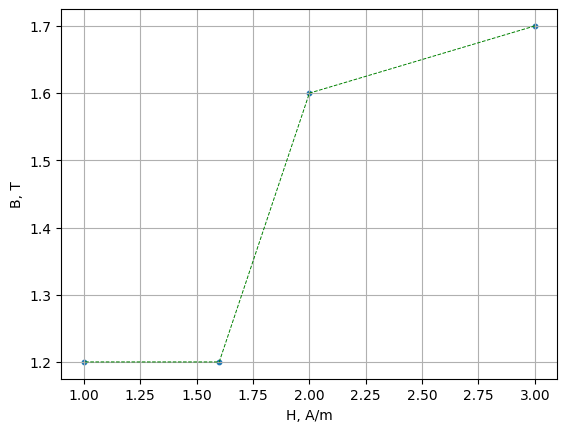

(     0
0  NaN
1  0.1
2  1.0
3 -0.0,      0
0  3.0
1  2.0
2  1.6
3  1.0)


In [64]:
# график пункт 1

# график
ox = x1
oy = y1

plt.scatter(
  ox,
  oy,
  s=10,
  label="Снятые точки"
)
plt.plot(
  ox,
  oy,
  'g--',
  linewidth=0.7,
  label="Снятые точки"
)
plt.xlabel("H, A/m")
plt.ylabel("B, T")
plt.grid()
# plt.legend(loc='best')
# plt.savefig("p3.png")
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()
print((oy.diff()/ox.diff(), ox))

# II второй пункт

In [11]:
kx = [0.05,  0.02,  0.01,  0.005, 0.1, ]
i  = [0.954, 0.365, 0.189, 0.092, 1.890, ] # A

#  Y: Ky=0.02, V = 0.0551, занимает весь экран
ky = [0.02,   0.05,   0.01,  ]
v  = [0.0550, 0.1366, 0.0260] # V

true_kx = R0 * 1.414213 * pd.DataFrame(i) / 5
true_kx.index=kx
# print(true_kx.to_latex())
true_ky = 1.414213 * pd.DataFrame(v) / 4
true_ky.index=ky
# print(true_ky.to_latex())
print(true_kx, true_ky, sep='\n')

              0
0.050  0.059363
0.020  0.022712
0.010  0.011761
0.005  0.005725
0.100  0.117606
             0
0.02  0.019445
0.05  0.048295
0.01  0.009192


# III третий пункт

In [ ]:
6 * true_ky[0][0.01]

0.055154307

In [ ]:
# 2y = весь экран, Ky=1. переключаем:  2y=6/8 клеток, ky=0.010
tau = 8 * 1 / (w *2*np.pi* 6 * true_ky[0][0.01])
print(tau)
Ri * Ci

0.46170085855132326


0.39999999999999997